In [ ]:
!pip install anthropic
!pip install -U google-genai

In [3]:
import json
import os
import google.generativeai as genai
from dotenv import load_dotenv
import json
from pathlib import Path
from openai import OpenAI
from anthropic import Anthropic
import base64, mimetypes
from IPython.display import Image, display
from google import genai
from google.genai import types
import time
import pandas as pd
import gspread
from google.colab import auth
from google.auth import default
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
from google.colab import drive
drive.mount('/content/drive')
OPENAI_API_KEY=""
ANTHROPIC_API_KEY=""
GOOGLE_API_KEY=""

In [10]:
essential_questions = [
'Chapter_2_Vectors_4/37',
'Chapter_2_Vectors_4/53',
'Chapter_5_Newton_laws_of_motion_10/39',
'Chapter_5_Newton_laws_of_motion_10/79',
'Chapter_5_Newton_laws_of_motion_10/81',
'Chapter_5_Newton_laws_of_motion_10/87',
'Chapter_6_Applications_of_Newton_Laws_15/29',
'Chapter_6_Applications_of_Newton_Laws_15/45',
'Chapter_6_Applications_of_Newton_Laws_15/51',
'Chapter_6_Applications_of_Newton_Laws_15/61',
'Chapter_6_Applications_of_Newton_Laws_15/63',
'Chapter_6_Applications_of_Newton_Laws_15/73',
'Chapter_6_Applications_of_Newton_Laws_15/93',
'Chapter_6_Applications_of_Newton_Laws_15/95',
'Chapter_6_Applications_of_Newton_Laws_15/109',
'Chapter_6_Applications_of_Newton_Laws_15/123',
'Chapter_6_Applications_of_Newton_Laws_15/125',
'Chapter_7_Work_and_Kinetic_Energy_4/101',
'Chapter_8_Potential_Energy_and_Conservation_of_energy_6/19',
'Chapter_8_Potential_Energy_and_Conservation_of_energy_6/49',
'Chapter_8_Potential_Energy_and_Conservation_of_energy_6/83',
'Chapter_9_Linear_Momentum_and_Collisions_11/53',
'Chapter_9_Linear_Momentum_and_Collisions_11/55',
'Chapter_9_Linear_Momentum_and_Collisions_11/63',
'Chapter_9_Linear_Momentum_and_Collisions_11/118',
'Chapter_10_Fixed_Axis_Rotation_15/65',
'Chapter_10_Fixed_Axis_Rotation_15/75',
'Chapter_10_Fixed_Axis_Rotation_15/77',
'Chapter_10_Fixed_Axis_Rotation_15/95',
'Chapter_10_Fixed_Axis_Rotation_15/115',
'Chapter_10_Fixed_Axis_Rotation_15/123',
'Chapter_11_Angular_Momentum_6/65',
'Chapter_11_Angular_Momentum_6/77',
'Chapter_12_Static_Equilibrium_and_Elasticity_13/27',
'Chapter_12_Static_Equilibrium_and_Elasticity_13/31',
'Chapter_12_Static_Equilibrium_and_Elasticity_13/33',
'Chapter_12_Static_Equilibrium_and_Elasticity_13/39',
'Chapter_12_Static_Equilibrium_and_Elasticity_13/41',
'Chapter_12_Static_Equilibrium_and_Elasticity_13/71',
'Chapter_12_Static_Equilibrium_and_Elasticity_13/75',
'Chapter_12_Static_Equilibrium_and_Elasticity_13/77',
'Chapter_12_Static_Equilibrium_and_Elasticity_13/79',
'Chapter_12_Static_Equilibrium_and_Elasticity_13/81',
'Chapter_14_Fluid_Mechanics_2/89',
'Chapter_17_Sound_4/41',
'Chapter_17_Sound_4/53'
]


In [11]:
len(essential_questions)

46

In [13]:
essential_questions_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/"

In [11]:
chapters = set()
for question in essential_questions:
  chapterName,chapterNumber = question.split('/')
  chapters.add(chapterName)

In [16]:
chapters = list(chapters)
for chapter in chapters:
  path = essential_questions_path+chapter
  os.makedirs(path, exist_ok=True)


In [20]:
gpt_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/GPT_answers_diagram_based_questions.json"
claude_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/anthropic_answers_diagram_based_questions.json"

with open(gpt_path, "r") as file:
  gpt_answers = json.load(file)

with open(claude_path, "r") as file:
  claude_answers = json.load(file)

##Corrective Measures on Selected Questions

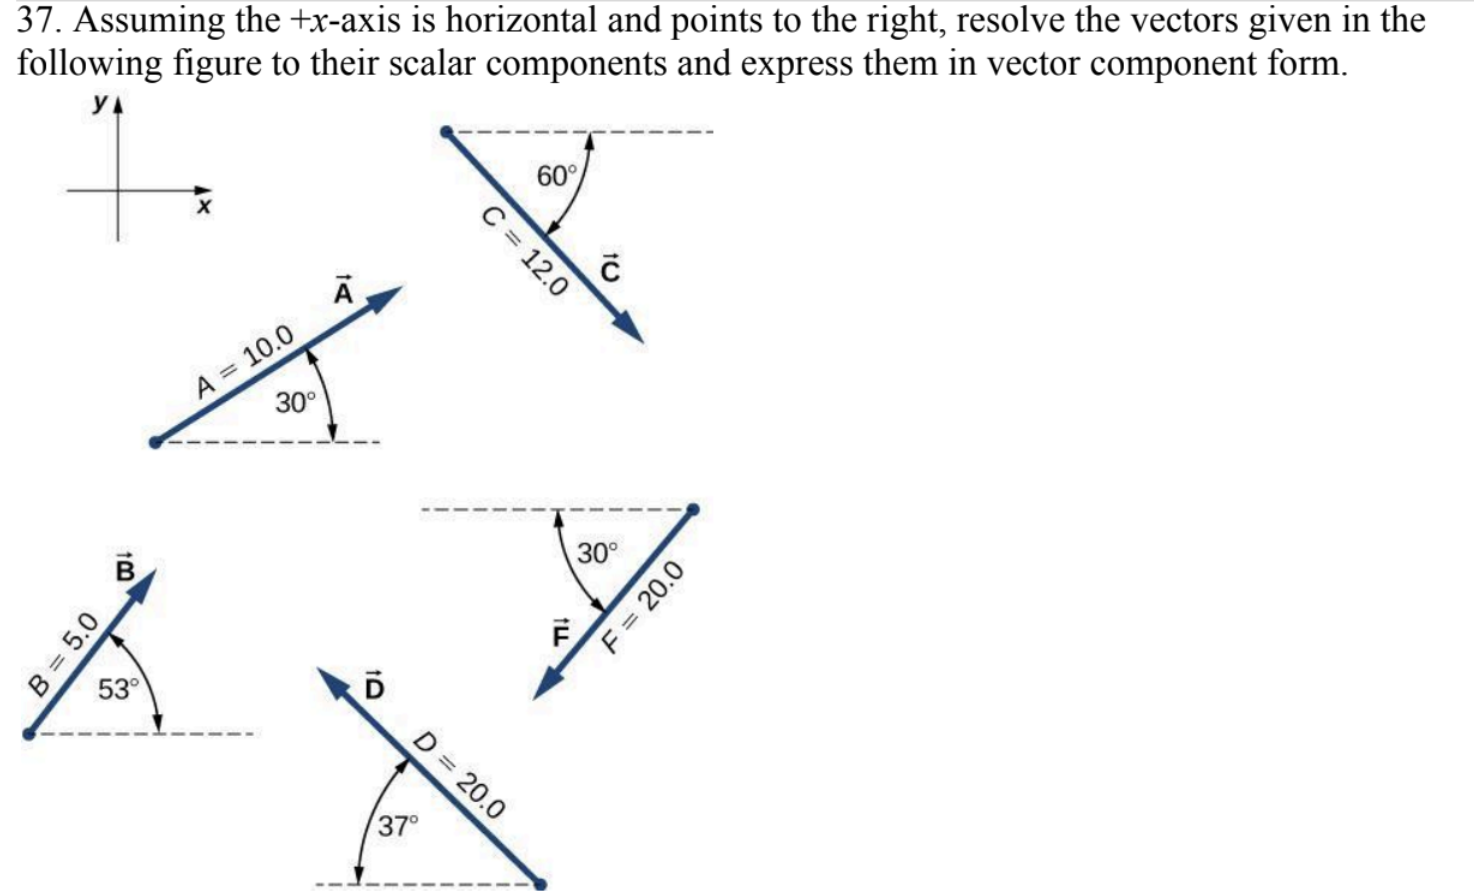




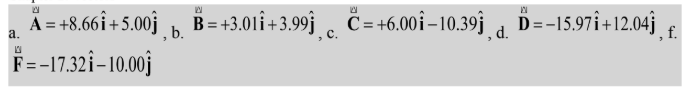

In [8]:
# Original GPT-5 result: Correct
# Original Sonnet-4.5 result: wrong
question_link = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_2_Vectors_4/37/q.png"

In [154]:
def generate_anthropic_answer(image_path="",THINKING_BUDGET=5000):
  MAX_TOKENS = 2*THINKING_BUDGET
  anthropicClient = Anthropic(api_key=ANTHROPIC_API_KEY)
  diagram_path = image_path
  mime, _ = mimetypes.guess_type(diagram_path)
  mime = mime or "image/png"
  CLAUDE_MODEL = "claude-sonnet-4-5-20250929"
  with open(diagram_path, "rb") as f:
    b64 = base64.b64encode(f.read()).decode("utf-8")
  # prompt = (
  #   "You are an expert physics professor. "
  #   "Solve the problem and all sub-parts step-by-step. "
  #   "For each part: write the key equation then substitute numbers and then compute. "
  #   "State assumptions if needed. "
  #   "Round your calculations to 2 decimal places. "
  #   "Be precise and concise—no extra commentary. "
  #   )

  # prompt = (
  #     "For vector B answer the following questions: "
  #     "One end of the arrow has a pointed tip. The other end has a dot "
  #     "1. Is the pointed tip to the left of dot? "
  #     "2. Is the pointed tip to the right of dot? "
  #     "3. Is the pointed tip above the dot? "
  #     "4. Is the pointed tip below the dot? "
  #     "Then solve the question for vector B only "
  # )

  # prompt = (
  #     "You are a visual annotator. You have a keen eye for detail. "
  #     "Your entire job is to look at the image and describe ONLY what you visually observe, "
  #     " with the precision of a professional image annotator. "
  #     "Think carefully before answering: "
  #     "1. For each vector, reason step by step about whether its head is visually above or below the "
  #     "origin (up_or_down) and to the left or right of the origin (left_or_right). "
  #     "2. Explicitly describe your thought process for each vector in words. "
  #     "From the image, for each labeled vector (A, B, C, D, F), based on where the head of the arrow lies, answer ONLY: "
  #     "Return your answer in this format: "
  #     "Thought process: "
  #     "- Vector A: ..."
  #     "- Vector B: ..."
  #     "- Vector C: ..."
  #     "- Vector D: ..."
  #     "- Vector F: ..."
  #     "Final answer:"
  #     "Vector A: up_or_down = ..., left_or_right = ..."
  #     "Vector B: up_or_down = ..., left_or_right = ..."
  #     "Vector C: up_or_down = ..., left_or_right = ..."
  #     "Vector D: up_or_down = ..., left_or_right = ..."
  #     "Vector F: up_or_down = ..., left_or_right = ..."
  # )
  # prompt = (
  #     "You are a visual annotator. You have a keen eye for detail. "
  #     "Your entire job is to look at the image and describe ONLY what you visually observe, "
  #     " with the precision of a professional image annotator. "
  #     "Think carefully before answering: "
  #     "1. For each vector, reason step by step about whether its head is visually above or below the "
  #     "origin (up_or_down) and to the left or right of the origin (left_or_right). "
  #     "2. Explicitly describe your thought process for each vector in words. "
  #     "From the image, for each labeled vector (A, B, C, D, F), based on where the head of the arrow lies, answer ONLY: "
  #     "Return your answer in this format: "
  #     "Thought process: "
  #     "- Vector A: ..."
  #     "- Vector B: ..."
  #     "- Vector C: ..."
  #     "- Vector D: ..."
  #     "- Vector F: ..."
  #     "Final answer:"
  #     "Vector A: up_or_down = ..., left_or_right = ..."
  #     "Vector B: up_or_down = ..., left_or_right = ..."
  #     "Vector C: up_or_down = ..., left_or_right = ..."
  #     "Vector D: up_or_down = ..., left_or_right = ..."
  #     "Vector F: up_or_down = ..., left_or_right = ..."
  # )
  # prompt = (
  #     "You are a visual annotator. You have a keen eye for detail. "
  #     "Your entire job is to look at the image and describe ONLY what you visually observe, "
  #     " with the precision of a professional image annotator. "
  #     "Think carefully before answering: "
  #     "1. For each vector, reason step by step about whether its head is visually above or below the "
  #     "origin (up_or_down) and to the left or right of the origin (left_or_right). "
  #     "2. Explicitly describe your thought process for each vector in words. "
  #     "From the image, for labeled vector B, based on where the head of the arrow lies, answer ONLY: "
  #     "Return your answer in this format: "
  #     "Thought process: "
  #     "- Vector B: ..."
  #     "Final answer:"
  #     "Vector B: up_or_down = ..., left_or_right = ..."
  # )
  # prompt = (
  #     "Think carefully step-by-step before answering: "
  #     "1. For each subdiagram observe the direction of vector "
  #     "2. Reason step by step about whether its vector's head is visually above or below the "
  #     "origin of (up_or_down) and to the left or right of the origin (left_or_right). "
  #     "3. Confirm if your conclusion is correct or not by approaching this specific task with a different approach"
  #     "4. Explicitly describe your thought process for each vector in words. "
  #     "Return your answer in this format: "
  #     "Thought process: "
  #     "- Vector X: ..."
  #     "Final answer:"
  #     "Vector X: up_or_down = ..., left_or_right = ..."
  # )
  # prompt = (
  #     "Describe the image. Tell all the information you can understand from the image"
  # )
  # prompt = (
  #     "You are a 5 year old kid with Directional Dyslexia. "
  #     "You cannot understand directions intuitively. "
  #     "In the given image try to observe each sub-diagram carefully. "
  #     "Think to yourself about details about the diagram. Question yourself if "
  #     "you are right or wrong by supporting your initial conclusion with atleast 3 evidences. "
  #     "In the end state your final conclusion."
  #     "Explicitly describe your thought process for each vector in words. "
  #     "Return your answer in this format: "
  #     "Thought process: "
  #     "- Vector X: ..."
  #     "Final answer:"
  #     "Vector X: up_or_down = ..., left_or_right = ..."
  #     "For example "
  #     "Thought process: "
  #     "- Vector X: "
  #     "Observation 1: This vector looks like it is in 1st quadrant. But I should not think in terms of quadrant. It is not reliable. "
  #     "Observation 1: The triangle tip is pointing leftward. I was wrong, the vector cannot be in 1st quadrant. "
  #     "It must be in 2nd or 3rd quadrant"
  #     "Observation 3: I need to carefully trace origin (a bold dot) of this subdiagram with the triangle tip. "
  #     "The direction of trace should be same as orientation of triangle tip. As I trace from origin to triangle tip "
  #     "the direction seems to be going up. Hence this vector must be in 2nd quadrant. "
  #     "Observation 4: Let me trace back from triangle tip to origin. I think I am in 2nd quadrant. If I traveled "
  #     "up and left from origin to reach here then if I travel down and right, I will arrive back at origin. "
  #     "But there is no line in this direction from triangle tip. I need to re-check my steps: "
  #     "1. Orientation of triangle tip "
  #     "2. Trace direction from origin to triangle tip "
  #     "3. Trace direction from triangle tip to origin should be opposite of the previous conclusion "
  #     "Final answer:"
  #     "Vector X: up_or_down = up, left_or_right = left"

  # )

  # prompt = (
  #     "What is the orientation of pointy triangle beside the letter 'B' ? Options: [up-left, up-right, down-right, down-left]"
  # )
  prompt = (
      "What is the orientation of pointy triangle beside the letter 'B' ? Options: [up-left, up-right, down-right, down-left]"
      "Isolate vector B, trace arrow from tail at origin, measure counterclockwise from +x."
  )


  # msg_img = anthropicClient.messages.create(
  #     model=CLAUDE_MODEL,
  #     max_tokens=MAX_TOKENS,
  #     thinking={"type": "enabled", "budget_tokens": THINKING_BUDGET},
  #     messages=[
  #         {
  #             "role": "user",
  #             "content": [
  #                 {
  #                     "type": "image",
  #                     "source": {"type": "base64", "media_type": mime, "data": b64},
  #                 },
  #                 {"type": "text", "text": prompt},
  #             ],
  #         }
  #     ],
  # )
  msg_img = anthropicClient.messages.create(
    model=CLAUDE_MODEL,
    max_tokens=MAX_TOKENS,
    temperature=0.1,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {"type": "base64", "media_type": mime, "data": b64},
                },
                {"type": "text", "text": prompt},
            ],
        }
    ],
)

  output = "".join(
      block.text for block in msg_img.content if getattr(block, "type", None) == "text"
  )
  return output

In [145]:
padded_question_link = "/content/padded_vectors.png"
text = generate_anthropic_answer(image_path=padded_question_link,THINKING_BUDGET=1000)
print(text)

Looking at vector **B** in the figure:

- The vector has magnitude B = 5.0
- The angle shown is 53° measured from the horizontal dashed line
- The arrow points **upward and to the left** from its tail

Tracing from the tail of the arrow to the head (the pointy end), the vector is oriented in the **up-left** direction.

**Answer: up-left**


In [137]:
text = generate_anthropic_answer(image_path=question_link,THINKING_BUDGET=1000)
print(text)

Looking at vector **B** in the figure:

- The vector has magnitude B = 5.0
- The angle shown is 53° measured from the horizontal dashed line
- The arrow points away from the origin (tail at bottom-left, head at top-right)

The vector is oriented in the **second quadrant** of the coordinate system, pointing upward and to the left from its tail.

The pointy triangle (arrowhead) beside the letter 'B' is at the head of the vector, which is positioned in the **up-left** direction.

**Answer: up-left**


In [127]:
alt_dig_path = "/content/Screenshot 2025-11-12 at 11.06.36 PM.png"
text = generate_anthropic_answer(image_path=alt_dig_path,THINKING_BUDGET=1000)
print(text)

Looking at the image, the pointy triangle (arrow) beside the letter 'B' is pointing toward the **up-right** direction.

The arrow starts from the lower left and points upward and to the right, making an angle with the horizontal dashed line.

**Answer: up-right**


In [126]:
alt_dig_path = "/content/Screenshot 2025-11-12 at 11.08.31 PM.png"
text = generate_anthropic_answer(image_path=alt_dig_path,THINKING_BUDGET=1000)
print(text)

Looking at the image, the vector **B** has an arrow that points in the **up-right** direction.

The vector makes an angle of 53° with the horizontal dashed line and points upward and to the right.

**Answer: up-right**


In [124]:
alt_dig_path = "/content/Screenshot 2025-11-12 at 11.10.59 PM.png"
text = generate_anthropic_answer(image_path=alt_dig_path,THINKING_BUDGET=1000)
print(text)

Looking at the image, I need to find the pointy triangle (arrow) beside the letter 'B'.

The vector **B** is shown in the lower left portion of the image, with magnitude 5.0 and at an angle of 53° from the horizontal dashed line.

The arrow beside the letter 'B' points in the **up-left** direction.

The answer is: **up-left**


In [134]:
import cv2
import numpy as np

def add_padding_cv2(img_path, padding=200, color=(255, 255, 255)):
    """
    Adds equal padding around an image.
    padding: number of pixels on each side.
    color: RGB padding color (255,255,255 = white).
    """

    # read image
    img = cv2.imread(img_path)

    # add border
    padded = cv2.copyMakeBorder(
        img,
        padding, padding, padding, padding,   # top, bottom, left, right
        cv2.BORDER_CONSTANT,
        value=color
    )

    return padded


# Example usage:
img = add_padding_cv2("/content/q (5).png", padding=200)

cv2.imwrite("padded_vectors.png", img)

True

In [148]:
import cv2

img = cv2.imread(question_link)
resized = cv2.resize(img, (1920, 1080), interpolation=cv2.INTER_CUBIC)
cv2.imwrite("Enlarged_img.png", resized)

True

In [155]:
enlarged_img_link = "/content/Enlarged_img.png"
text = generate_anthropic_answer(image_path=enlarged_img_link,THINKING_BUDGET=1000)
print(text)

Looking at vector **B** in the figure:

- The vector has magnitude B = 5.0
- The angle shown is 53° measured from the horizontal dashed line
- The arrow points from the tail (at the origin/lower left) upward and to the right

Tracing from the tail of the arrow to the head (the pointy triangle), the direction is **up-right** or toward the upper-right quadrant.

**Answer: up-right**


##Google Sheet

In [13]:
sh = gc.open_by_key("1Q1l4hxWjlCJdX2Q_Yaw_W6S3Ep0-Mpxe7EJWqft6eJ0")
worksheet = sh.sheet1
sheet = pd.DataFrame(worksheet.get_all_records())


In [14]:
sheet

,Chapter #,Question #,Diagram,Output Result (Right/Wrong) [GPT-5],Output Result (Right/Wrong) [Sonnet-4.5],Data Cleaning Reason,Error Category
0,2,33,Non-Essential,,,,
1,2,37,Essential,,Wrong,,Misread Diagram
2,2,41,Non-Essential,,,,
3,2,53,Essential,Wrong,Wrong,,Misread Diagram
4,3,31,Essential,Wrong,Wrong,Multimodal Answer,Misread Diagram
...,...,...,...,...,...,...,...
101,,,,,,,
102,,,,,,My Proposal: 53 - 7 = 46 (Consider dataset of...,
103,,,,,,,
104,,,,,,There are 53 rows where the Category (Diagram)...,
